In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
##converter = lambda x: pd.to_numeric(x, 'coerce')
df = pd.read_csv('Chicago_Crime_Detective.csv')
df.head()

H:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [3]:
df['District']=pd.to_numeric(df['District'],errors='coerce')
df['CommunityArea']=pd.to_numeric(df['CommunityArea'], errors='coerce')
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           191641 non-null  int64         
 1   ID                   191641 non-null  int64         
 2   Date                 191641 non-null  datetime64[ns]
 3   LocationDescription  191641 non-null  object        
 4   Arrest               191641 non-null  bool          
 5   Domestic             191641 non-null  bool          
 6   Beat                 191641 non-null  int64         
 7   District             148585 non-null  float64       
 8   CommunityArea        167025 non-null  float64       
 9   Year                 191641 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 12.1+ MB


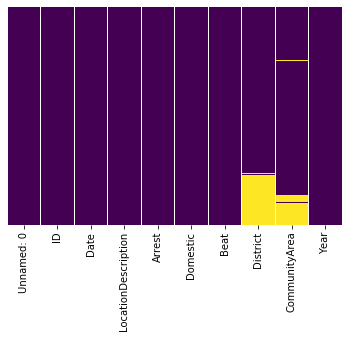

In [4]:
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap='viridis')

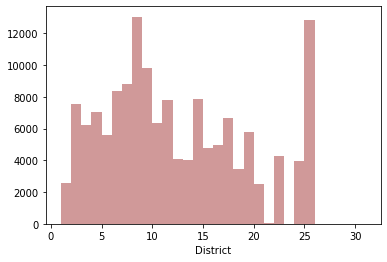

In [5]:
sns.distplot(df['District'].dropna(), kde=False, color='darkred', bins=30)

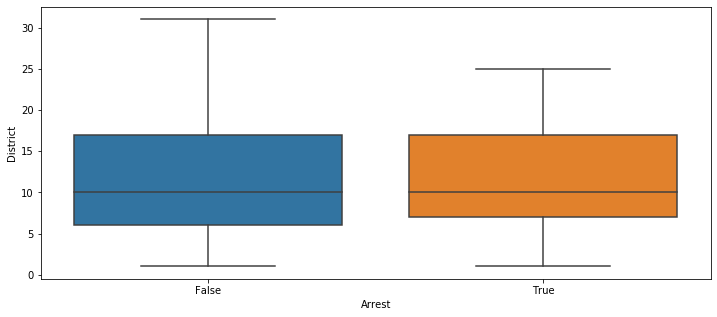

In [6]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Arrest', y='District', data = df)

In [7]:
def inpute_dist(cols):
    district = cols[0]
    arr = cols[1]
    if pd.isnull(district):
        if arr == False:
            return 10
        else:
            return 10
    else:
        return district

In [8]:
df['District']=df[['District','Arrest']].apply(inpute_dist,axis=1)

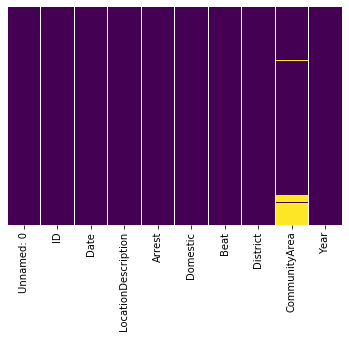

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

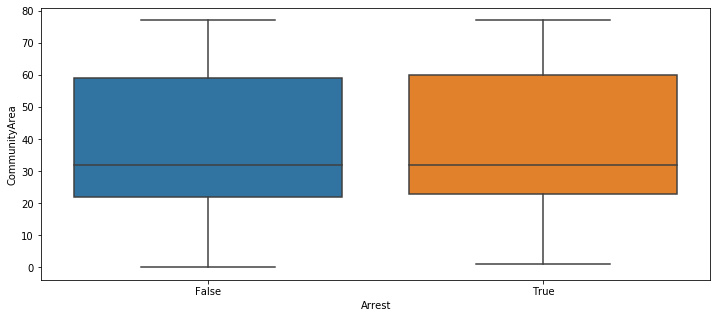

In [10]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Arrest', y='CommunityArea', data = df)

In [11]:
def inpute_com(cols):
    community=cols[0]
    arr=cols[1]
    if pd.isnull(community):
        if arr==False:
            return 32
        else:
            return 32
    else:
        return community

In [12]:
df['CommunityArea']=df[['CommunityArea','Arrest']].apply(inpute_com,axis=1)

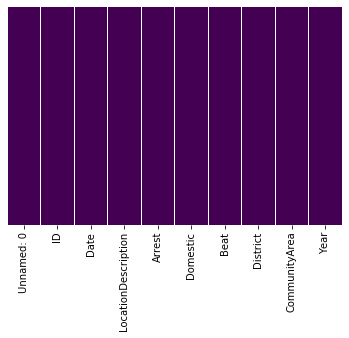

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
median = df.median()

In [15]:
print(median)

Unnamed: 0         95820.0
ID               4762956.0
Arrest                 0.0
Domestic               0.0
Beat                1121.0
District              10.0
CommunityArea         32.0
Year                2006.0
dtype: float64


In [16]:
date_numeric=pd.to_numeric(df['Date'])
date_median_numeric=np.median(date_numeric)
date_median=pd.to_datetime(date_median_numeric)

In [17]:
print(date_median)

2006-05-21 12:30:00


In [18]:
thefts = df['Beat'] + df['District'] + df['CommunityArea']
df['TotalThefts'] = thefts

In [19]:
min_theft = df['TotalThefts'].idxmin()
print(df['Date'][min_theft])

2006-05-28 17:00:00


In [20]:
maxval = df['TotalThefts'].max()
print(maxval)

2583.0


In [21]:
index=[]
for i in df['TotalThefts']:
    if df['TotalThefts'][i]==2583.0:
        index.append(i)

In [22]:
counts = df['TotalThefts'].value_counts()
print(counts)

906.0     1846
2582.0    1682
2583.0    1406
905.0     1265
807.0     1264
          ... 
2561.0       1
593.0        1
794.0        1
2338.0       1
1097.0       1
Name: TotalThefts, Length: 869, dtype: int64


In [23]:
maxvalind=df['TotalThefts'].idxmax()
print(df['Date'][maxvalind])

2012-12-30 15:00:00


In [24]:
select = df.loc[df['Arrest']==True, 'TotalThefts']

In [83]:
new_ind = select.idxmax()

In [26]:
print(df['Date'][new_ind])

2012-12-30 15:00:00


In [27]:
print(new_ind)

59


In [28]:
print(df['Date'][59])

2012-12-30 15:00:00


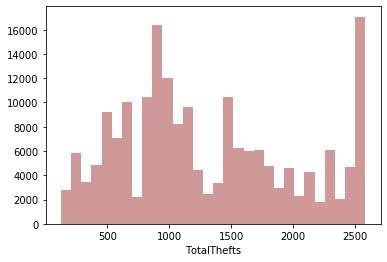

In [34]:
sns.distplot(df['TotalThefts'], kde=False, color='darkred', bins=30)

In [35]:
print(df['Year'].value_counts())

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64


In [36]:
print(df.groupby("Year")["TotalThefts"].count())

Year
2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
Name: TotalThefts, dtype: int64


In [37]:
print(df.groupby("Year").count())

      Unnamed: 0     ID   Date  LocationDescription  Arrest  Domestic   Beat  \
Year                                                                           
2001       20669  20669  20669                20669   20669     20669  20669   
2002       18753  18753  18753                18753   18753     18753  18753   
2003       16657  16657  16657                16657   16657     16657  16657   
2004       16862  16862  16862                16862   16862     16862  16862   
2005       16484  16484  16484                16484   16484     16484  16484   
2006       16098  16098  16098                16098   16098     16098  16098   
2007       14280  14280  14280                14280   14280     14280  14280   
2008       14445  14445  14445                14445   14445     14445  14445   
2009       12167  12167  12167                12167   12167     12167  12167   
2010       15497  15497  15497                15497   15497     15497  15497   
2011       15637  15637  15637          

In [47]:
grouping = df.groupby("Year")["TotalThefts"].sum()

In [53]:
print(grouping)

Year
2001    27456946.0
2002    24540586.0
2003    21592057.0
2004    22104075.0
2005    21619959.0
2006    20370673.0
2007    18602114.0
2008    18628534.0
2009    16380214.0
2010    20398346.0
2011    20446954.0
2012    18420313.0
Name: TotalThefts, dtype: float64


<BarContainer object of 12 artists>

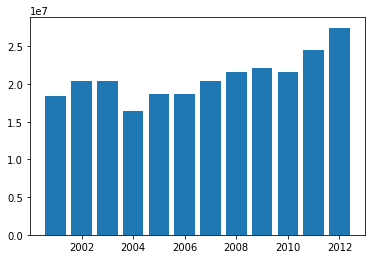

In [82]:
x_axis = df.Year.unique()
y_axis = grouping
plt.bar(x_axis,y_axis)

In [85]:
print(select.shape)

(15536,)


In [87]:
df['busted'] = df.loc[df['Arrest']==True, 'TotalThefts']

In [88]:
grouping2 = df.groupby("Year")["busted"].sum()

<BarContainer object of 12 artists>

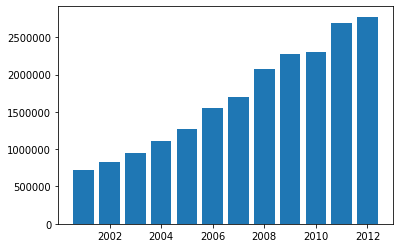

In [92]:
x_axis = df.Year.unique()
y_axis = grouping2
plt.bar(x_axis,y_axis)

In [93]:
print(grouping2)

Year
2001    2775231.0
2002    2696549.0
2003    2306359.0
2004    2273038.0
2005    2069056.0
2006    1700042.0
2007    1555534.0
2008    1266710.0
2009    1107838.0
2010     953245.0
2011     823845.0
2012     723903.0
Name: busted, dtype: float64


In [94]:
print(2775231.0/27456946.0)

0.10107573507993205


In [95]:
print(1555534.0/18602114.0)

0.08362135615339203


In [100]:
location = df.groupby("LocationDescription")["TotalThefts"].sum()

In [104]:
popular = location.nlargest(6)
print(popular)

LocationDescription
STREET                            206322156.0
PARKING LOT/GARAGE(NON.RESID.)     19039723.0
OTHER                               5824679.0
ALLEY                               3067813.0
GAS STATION                         2479380.0
DRIVEWAY - RESIDENTIAL              2141265.0
Name: TotalThefts, dtype: float64


In [109]:
loc1 = df.loc[df['LocationDescription']=="STREET", 'TotalThefts']
loc2 = df.loc[df['LocationDescription']=="PARKING LOT/GARAGE(NON.RESID.)", 'TotalThefts']
loc3 = df.loc[df['LocationDescription']=="ALLEY", 'TotalThefts']
loc4 = df.loc[df['LocationDescription']=="GAS STATION", 'TotalThefts']
loc5 = df.loc[df['LocationDescription']=="DRIVEWAY - RESIDENTIAL", 'TotalThefts']

In [117]:
a = loc1.size + loc2.size + loc3.size + loc4.size + loc5.size

In [118]:
print(a)

177510


In [119]:
print(loc4.size)

2111


In [121]:
print(loc4.idxmax())

17502


In [123]:
print(loc4.max())

2583.0


In [122]:
print(df['TotalThefts'][17502])

2583.0


In [124]:
print(df['Date'][17502])

2011-10-08 01:00:00
